In [1]:
##!/usr/bin/env python3
#%% imports
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib qt

# def bpsk_gen(n):
#     """
#     Função que retorna um vetor (n, 1) contando a sequência binária 
#     x com valores {-1, 1}.
#     """
#     x = np.ones((n, 1))
#     for value in x:
#         if np.random.rand() < 0.5:
#             value *=-1
#     return x


In [2]:
import IPython.display as ipd

In [13]:
rate=22050
f = 800
f1 = 550
audio = 0.1*np.random.randn(rate) + np.sin(2*np.pi*f*np.linspace(0,1,rate)) +np.sin(2*np.pi*f1*np.linspace(0,1,rate))
ipd.Audio(data=audio, rate=rate)

In [23]:
# Parâmetros do algorítimo LMS:
M = 21            # Ordem do filtro (taps)
step = 0.001      # Passo de aprendizadem

# Sequência binária:
N = 100     # Tamanho da seqência
xn = bpsk_gen(N)

# Canal:
H = np.array([0.25, 1, -0.25])
# Ruído:
sigma = np.sqrt(0.01)  # Desvio padrão a partir da ver. especificada
noise = np.random.normal(0, sigma, (N, 1))

# Sinal no receptor:
ch_out = signal.lfilter(H, 1, xn) + noise

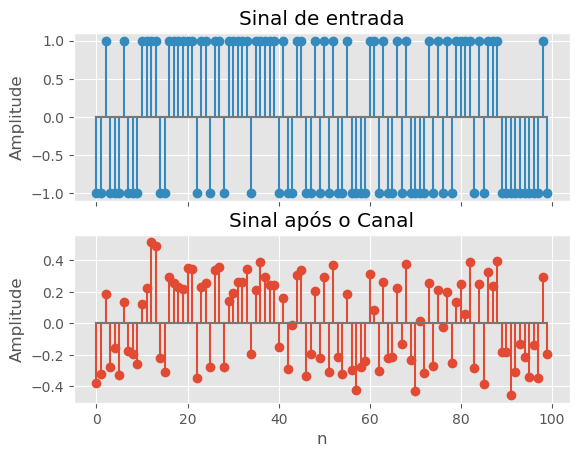

[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]]
[[-0.37836547]
 [-0.32067485]
 [ 0.18462043]
 [-0.27918739]
 [-0.15483504]
 [-0.32894991]
 [ 0.13906346]
 [-0.17780327]
 [-0.19504288]
 [-0.25527697]
 [ 0.12225442]
 [ 0.22481446]
 [ 0.51448681]
 [ 0.49017191]
 [-0.22142572]
 [-0.30815012]
 [ 0.29567747]
 [ 0.25879648]
 [ 0.22856205]
 [ 0.21599461]

In [24]:
# Visualizando:
with plt.style.context('ggplot', True):
    fig, ax = plt.subplots(2, 1, sharex=True)
    ax[0].stem(xn, linefmt='C1-', markerfmt='C1o')
    ax[0].set_title('Sinal de entrada')
    ax[0].set_ylabel('Amplitude')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('Sinal após o Canal')
    ax[1].stem(ch_out, linefmt='C0-', markerfmt='C0o')
    ax[1].set_xlabel('n')
    plt.savefig('test_fig.png')
    plt.show()

print(xn)
print(ch_out)

In [34]:
# 
L = 0 # tal que L < N
# d = xn[] 
erro = np.zeros((N, 1))

# LMS:
# Inicializando vetor de pesos e a janela u:
w = np.zeros((M, 1))
u = np.zeros((M, 1))
mt_W = np.zeros((N, w.size, 1))

# for n in range(N):
e = 1
n = 0
l = 0
while abs(e) > 1e-3:
    # Vetor u:
    u = np.insert(u, 0, ch_out[-(n+1)])
    u = np.delete(u, -1)
    u = u.reshape(u.size, 1)
    # Cálculo do erro: sinal desejado - saída do filtro
    y = w.T @ u
    e = xn[0 - L] - y
    # Atualiza o vetor de pesos:
    w += step*u*e
    #n
#     n += 1
    l+=1
print('sai:', e, l, 'iter:', n)
# erro[n] = e
# mt_W[n, :] = w
    
#     # Vetor u:
#     u = np.insert(u, 0, ch_out[-(n+1)])
#     u = np.delete(u, -1)
#     u = u.reshape(u.size, 1)

#     # Cálculo do erro: sinal desejado - saída do filtro
#     erro[n] = xn[n - L] - w.T @ u

#     # Atualiza o vetor de pesos:
#     w += step*u*erro[n]    # Fonte: Haykin - Adptive Filter Theory (cap 5)
    
#     mt_W[n, :] = w

sai: [[-0.00099933]] 8933 iter: 0


In [21]:
mt_W.shape

(1000000, 21, 1)

In [33]:
w

array([[0.24970638],
       [0.24951439],
       [0.24932242],
       [0.24913045],
       [0.24893851],
       [0.2487466 ],
       [0.24855472],
       [0.24836289],
       [0.2481711 ],
       [0.24797937],
       [0.24778771],
       [0.24759611],
       [0.24740459],
       [0.24721316],
       [0.24702182],
       [0.24683058],
       [0.24663944],
       [0.24644842],
       [0.24625751],
       [0.24606674],
       [0.24587609]])

In [ ]:
clear all
clc
%o sinal que saira do canal resultara em 0.25x[n] + x[n-1] - 0.25x[n-2] que
%é demonstrado no vetor a seguir:

x=[-1 1 -1 1 -1 1 1 -1 -1 1 1 -1 1 1 -1 -1 1 -1 -1 -1 1]; %sequencia de bernoulli (numeros 0(-1) e 1(+1) aparecerão, matriz 1xN)   
%x = randi([0 1],1,700);
N=length(x);
n = 1:1:N;
u = zeros(1,N);
v = zeros(1,N);
v = awgn(v,20);
for i=1:1
	u(i) = 0.25*x(i) + v(i);
end
for i=2:2
	u(i) = 0.25*x(i) + x(i-1) + v(i) + v(i-1);
end
for i=3:N
	u(i) = 0.25*x(i) + x(i-1) - 0.25*x(i-2) + v(i) + v(i-1) + v(i-2);
end
%segue o plot de x e u
subplot(211)
stem(1:length(x),x)
title('Sequencia aleatória de Bernoulli');
axis([0,N,-2,2])
grid
subplot(212)
stem(1:length(u),u)
title('Sequencia aleatória de Bernoulli com ruído'); 
axis([0,N,-2,2])
grid

% agora a aplicação do filtro adaptativo
L = 11; %tamanho do filtro
w = zeros(1,N);
umi=10^-3;
e=0.1;
y=0;
j=L+1;
k=1;
while e > 10^-5
    d(k) = x(j-L);
    y(k) = abs((w(k))'.*u(k));
    e(k) = abs(d(k) - y(k));
    %w(k+1) = w(k) + ((umi/N).*(xcorr(x(k),d)-autocorr(x(k))));
    w = w - umi.*(e(k).*x);
    k=k+1;
    j=k+L-1;
    if k==N %numero N maximo de interações devido o fator e(k)
       break
    end  
end

      error: =: nonconformant arguments (op1 is 1x1, op2 is 1x21)  